<a href="https://colab.research.google.com/github/shishirjain/Solution-Machine-Learning-using-python.-Manaranjan-Pradhan/blob/main/Chapter_2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/bollywood.csv',index_col=['SlNo'])

In [ ]:
df.head()

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


1. How many records are present in the dataset? Print the metadata information of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 149
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release Date         149 non-null    object 
 1   MovieName            149 non-null    object 
 2   ReleaseTime          149 non-null    object 
 3   Genre                149 non-null    object 
 4   Budget               149 non-null    int64  
 5   BoxOfficeCollection  149 non-null    float64
 6   YoutubeViews         149 non-null    int64  
 7   YoutubeLikes         149 non-null    int64  
 8   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 11.6+ KB


2. How many movies got released in each genre? Which genre had highest number of releases? Sort
number of releases in each genre in descending order.

In [ ]:
df['Genre'].value_counts().sort_values(ascending=False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64

3. How many movies in each genre got released in different release times like long weekend, festive
season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [ ]:
pd.crosstab(index=df['Genre'], columns=df['ReleaseTime'],margins=True,margins_name='Total')

ReleaseTime,FS,HS,LW,N,Total
Genre,,,,,
Drama,4,6,1,24,35
Action,3,3,3,12,21
Action,0,0,0,3,3
Comedy,3,5,5,23,36
Romance,3,3,4,15,25
Thriller,4,1,1,20,26
Thriller,0,0,1,2,3
Total,17,18,15,99,149


4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
called month from ReleaseDate column.)

In [ ]:
df['Release Date']=pd.to_datetime(df['Release Date'])

In [ ]:
np.dtype(df['Release Date'])

dtype('<M8[ns]')

In [ ]:
df['Month_of_release']=df['Release Date'].dt.month_name()

In [ ]:
df['Month_of_release'].value_counts().idxmax()

'January'

5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with
budget of 25 crore or more?

In [ ]:
df[['Month_of_release','Budget']].where(df['Budget']>25,).value_counts('Month_of_release').idxmax()

'February'


6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on
investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [ ]:
df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
df[['MovieName','ROI']].sort_values(by=['ROI'],ascending=False)[0:9]

,MovieName,ROI
SlNo,,
65,Aashiqui 2,8.166667
90,PK,7.647059
133,Grand Masti,7.514286
136,The Lunchbox,7.500000
88,Fukrey,6.240000
59,Mary Kom,5.933333
129,Shahid,5.666667
38,Humpty Sharma Ki Dulhania,5.500000
102,Bhaag Milkha Bhaag,4.466667


7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate
the average ROI for different release times.

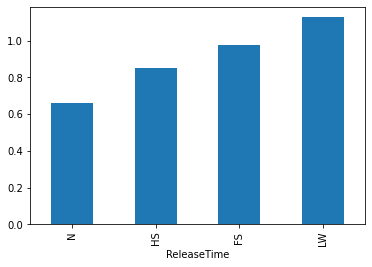

In [ ]:
df.groupby('ReleaseTime')['ROI'].mean().sort_values().plot(kind='bar')
#As we can see from the plot that movies release on Longweekend or Festive season have more average ROI 

8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the
plot to conclude if the most movies are high or low budgeted movies.

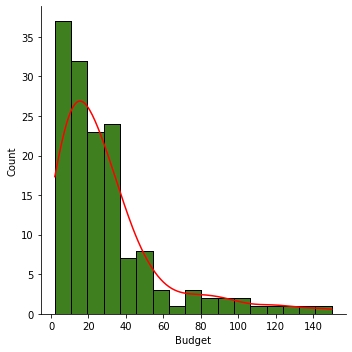

In [ ]:
sns.displot(df['Budget'],kde=True,color='r'),sns.histplot(df['Budget'],color='g')

plt.show()
#We can clearly see that most of the movies are low budget i.e less than 40 cr

9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre
typically sees higher ROIs?

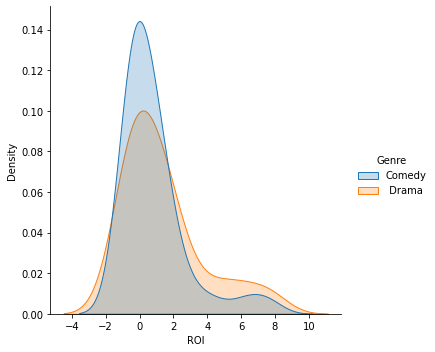

In [ ]:
sns.displot(data=df[df['Genre'].isin([' Drama ','Comedy'])],x='ROI',hue='Genre',kind='kde',fill=True,)


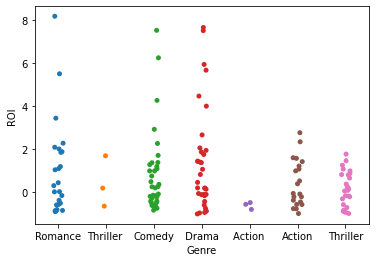

In [ ]:
sns.stripplot(x='Genre',y='ROI',data=df)

10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or
negative?

In [ ]:
df[['BoxOfficeCollection','YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies
to compare.

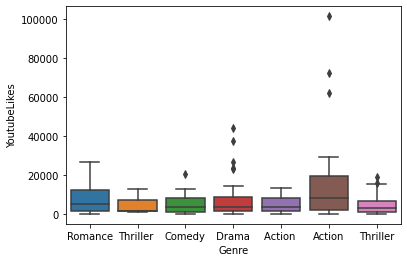

In [ ]:
sns.boxplot(x='Genre',y='YoutubeLikes',data=df)
#Action movies 

12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,
YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

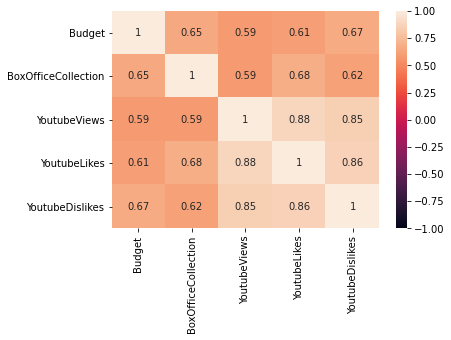

In [ ]:
sns.heatmap(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes' ]].corr(),annot=True,vmax=1,vmin=-1)
#Youtube likes/dislikes are highly correlated with youtube views and this insight is intuitive also.
#All parameter are positively correlated and it is counter intuitive that box office collection is equivalently positively correlated to dislikes as muuch to likes.


**SAheart Dataset**

In [ ]:
ds=pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/SAheart.data',index_col='row.names')

In [ ]:
ds.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


13. How many records are present in the dataset? Print the metadata information of the dataset.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


14. Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

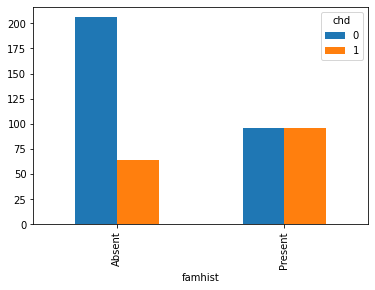

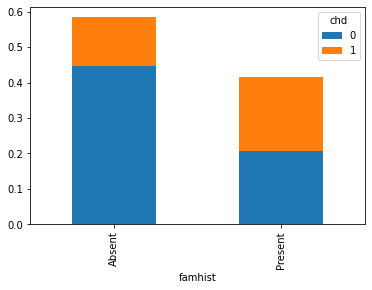

In [ ]:

pd.crosstab(index=ds['famhist'],columns=ds['chd']).plot.bar(),
pd.crosstab(index=ds['famhist'],columns=ds['chd'],normalize=True).plot.bar(stacked =True)


15. Does age have any correlation with sbp? Choose appropriate plot to show the relationship.

In [ ]:
ds[['age','sbp']].corr()

,age,sbp
age,1.000000,0.388771
sbp,0.388771,1.000000


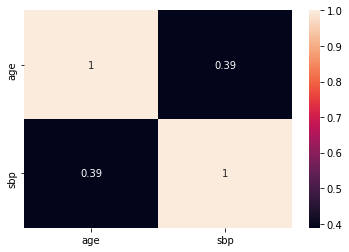

In [ ]:
sns.heatmap(ds[['age','sbp']].corr(),annot=True)
#Since the value of coeeficient is low, we can say that age can explain 0.39 or 39% variability of SBP

16. Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease?

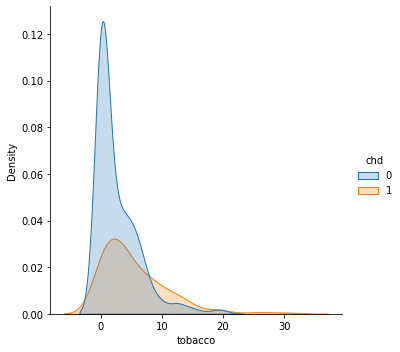

In [ ]:
sns.displot(data=ds['chd'],x=ds['tobacco'],hue=ds['chd'],kind='kde',fill=True,)

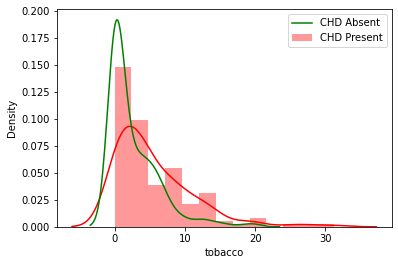

In [ ]:
sns.distplot(ds[ds['chd']==1]['tobacco'],color='r',label='CHD Present', )
sns.distplot(ds[ds['chd']==0]['tobacco'],color='g',label='CHD Absent',hist=False)
plt.legend()
#people having CHD consume more amount of tobacco

17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

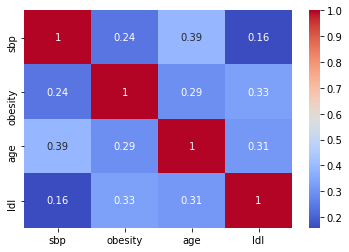

In [ ]:
sns.heatmap(ds[['sbp', 'obesity', 'age','ldl']].corr(),cmap='coolwarm',annot=True)
#We can 

18. Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below.
(0–15): young,
(15–35): adults,
(35–55): mid,
(55–): old

In [ ]:
ds['age-group']=pd.cut(ds['age'],[0,15,35,55,max(ds['age'])],labels=['young','adult','mid','old'])
ds['age-group'].value_counts()

mid      204
adult    141
old      114
young      3
Name: age-group, dtype: int64

19. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

(mid      81
 old      61
 adult    18
 young     0
 Name: age-group, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdceb1a8150>)

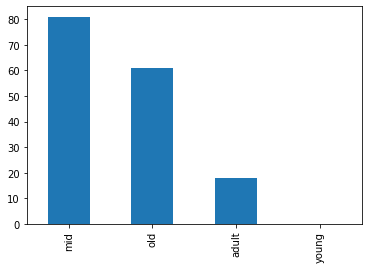

In [ ]:
ds[ds['chd']==1]['age-group'].value_counts().sort_values(ascending=False),ds[ds['chd']==1]['age-group'].value_counts().sort_values(ascending=False).plot.bar()

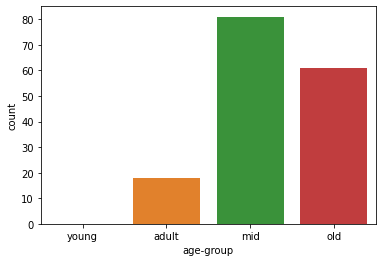

In [ ]:
sns.countplot(x='age-group',data=ds[ds['chd']==1],)

20. Draw a box plot to compare distributions of ldl for different age groups.

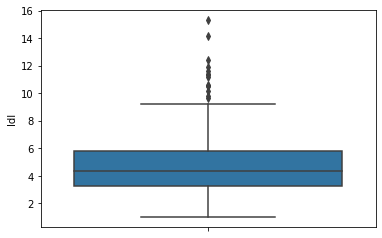

In [ ]:
sns.boxplot(y='ldl',data=ds)

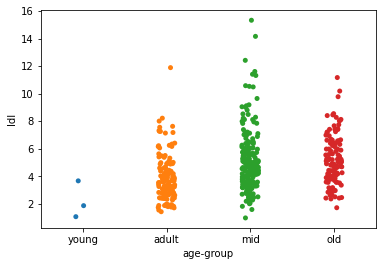

In [ ]:
sns.stripplot(data=ds,x='age-group',y='ldl')